In [61]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [62]:
df = pd.read_csv("C:\employee-performance-prediction\Extended_Employee_Performance_and_Productivity_Data.csv")
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [63]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")

df["Hire_Year"] = df["Hire_Date"].dt.year
df["Hire_Day"] = df["Hire_Date"].dt.day
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Hire_Year,Hire_Day
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,22,2,0,14,66,0,2.63,False,2022,19
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,13,14,100,12,61,2,1.72,False,2024,18
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,6,3,50,10,1,0,3.17,False,2015,26
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,28,12,100,10,0,1,1.86,False,2016,22
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,29,13,100,15,9,1,1.25,False,2021,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,5,3,75,16,48,2,1.28,False,2022,7
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,7,0,0,10,77,1,3.48,True,2018,24
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,6,5,0,5,87,1,2.60,False,2015,24
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,10,1,75,2,31,1,3.10,False,2015,3


In [66]:
df = df.drop(columns=['Hire_Date','Education_Level'])
df

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Hire_Year,Hire_Day
0,1,IT,Male,55,Specialist,2,5,6750.0,33,32,22,2,0,14,66,0,2.63,False,2022,19
1,2,Finance,Male,29,Developer,0,5,7500.0,34,34,13,14,100,12,61,2,1.72,False,2024,18
2,3,Finance,Male,55,Specialist,8,3,5850.0,37,27,6,3,50,10,1,0,3.17,False,2015,26
3,4,Customer Support,Female,48,Analyst,7,2,4800.0,52,10,28,12,100,10,0,1,1.86,False,2016,22
4,5,Engineering,Female,36,Analyst,3,2,4800.0,38,11,29,13,100,15,9,1,1.25,False,2021,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,1,4,4900.0,55,46,5,3,75,16,48,2,1.28,False,2022,7
99996,99997,IT,Female,36,Consultant,6,5,8250.0,39,35,7,0,0,10,77,1,3.48,True,2018,24
99997,99998,Operations,Male,53,Analyst,8,2,4800.0,31,13,6,5,0,5,87,1,2.60,False,2015,24
99998,99999,HR,Female,22,Consultant,9,5,8250.0,35,43,10,1,75,2,31,1,3.10,False,2015,3


<Axes: xlabel='Years_At_Company', ylabel='Count'>

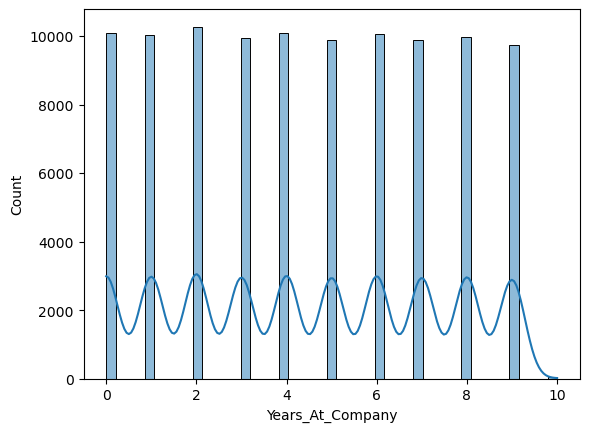

In [67]:
sns.histplot(df['Years_At_Company'],kde=True)

<Axes: xlabel='Monthly_Salary', ylabel='Count'>

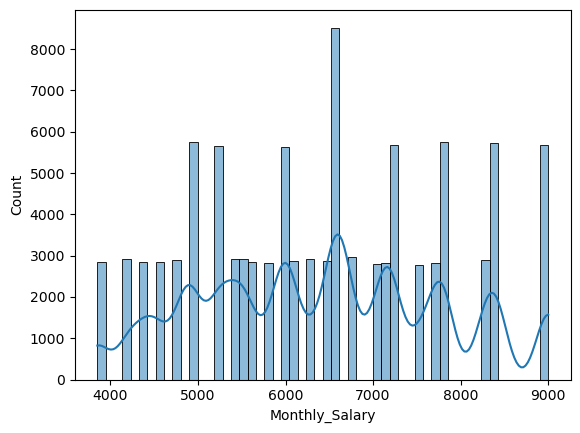

In [68]:
sns.histplot(df['Monthly_Salary'],kde=True)

In [69]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
df['Department']=encoder.fit_transform(df['Department'])
df['Gender']=encoder.fit_transform(df['Gender'])
df['Job_Title']=encoder.fit_transform(df['Job_Title'])
df['Resigned']=encoder.fit_transform(df['Resigned'])
df


,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Hire_Year,Hire_Day
0,1,4,1,55,5,2,5,6750.0,33,32,22,2,0,14,66,0,2.63,0,2022,19
1,2,2,1,29,2,0,5,7500.0,34,34,13,14,100,12,61,2,1.72,0,2024,18
2,3,2,1,55,5,8,3,5850.0,37,27,6,3,50,10,1,0,3.17,0,2015,26
3,4,0,0,48,0,7,2,4800.0,52,10,28,12,100,10,0,1,1.86,0,2016,22
4,5,1,0,36,0,3,2,4800.0,38,11,29,13,100,15,9,1,1.25,0,2021,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,1,4,4900.0,55,46,5,3,75,16,48,2,1.28,0,2022,7
99996,99997,4,0,36,1,6,5,8250.0,39,35,7,0,0,10,77,1,3.48,1,2018,24
99997,99998,7,1,53,0,8,2,4800.0,31,13,6,5,0,5,87,1,2.60,0,2015,24
99998,99999,3,0,22,1,9,5,8250.0,35,43,10,1,75,2,31,1,3.10,0,2015,3


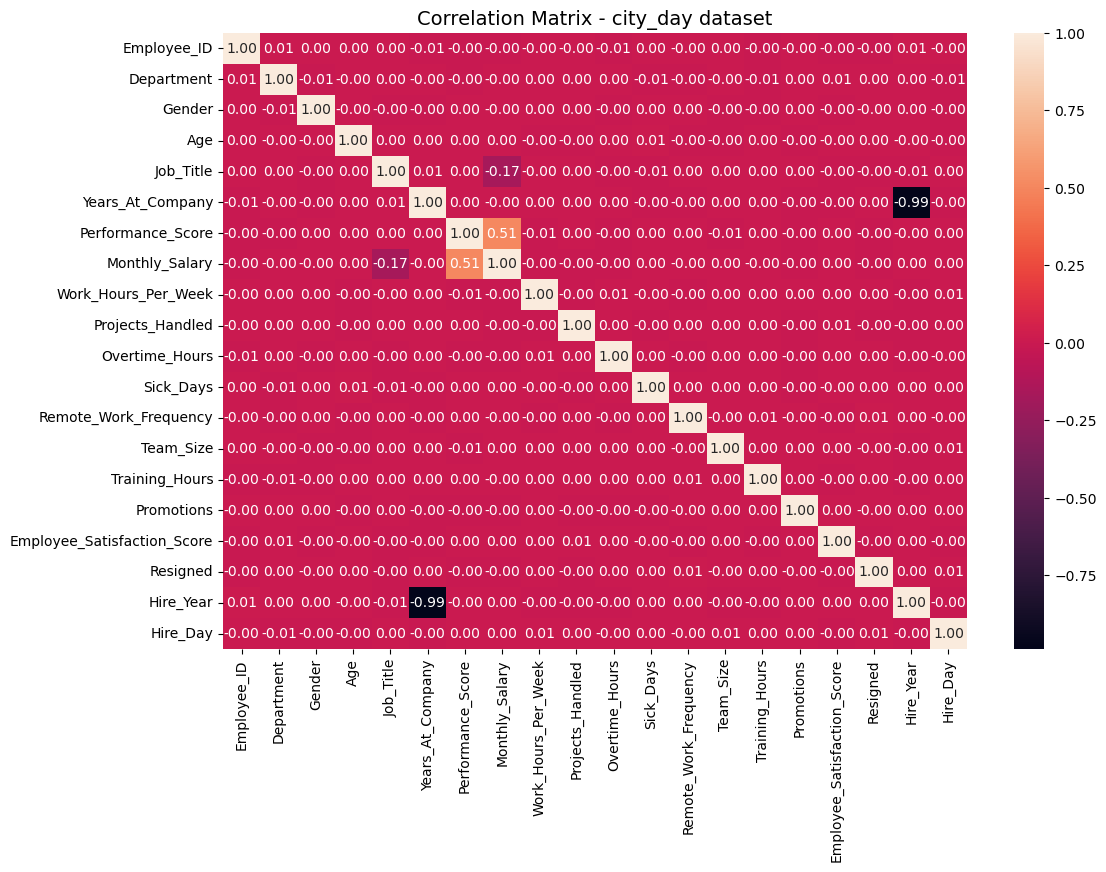

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix - city_day dataset", fontsize=14)
plt.show()

MODEL TRAINING:

In [71]:
X = df.drop(columns=["Performance_Score","Employee_ID"])
y = df["Performance_Score"]

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

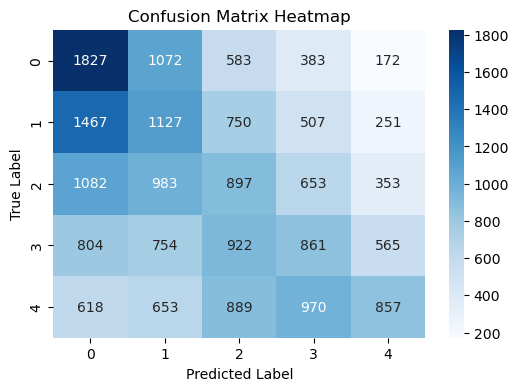

In [74]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

LogisticRegression :

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Logistic Regression
Accuracy: 0.3511
F1 Score: 0.3272297759943659
Confusion Matrix:
 [[2405  470  524  638    0]
 [1575  832  529  373  793]
 [1137  376  801  455 1199]
 [1059    1  459  698 1689]
 [ 762  342   18  579 2286]]
ROC-AUC: 0.6616737001880459


DECISION TREE:

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Decision Tree
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[4037    0    0    0    0]
 [   0 4102    0    0    0]
 [   0    0 3968    0    0]
 [   0    0    0 3906    0]
 [   0    0    0    0 3987]]
ROC-AUC: 1.0


KNN :

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)

print("K-Nearest Neighbors(KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


K-Nearest Neighbors(KNN)
Accuracy: 0.2826
F1 Score: 0.2786438146129909
Confusion Matrix:
 [[1820 1128  607  345  137]
 [1445 1184  739  500  234]
 [1042  999  904  643  380]
 [ 732  763  935  864  612]
 [ 563  636  896 1012  880]]
ROC-AUC: 0.5915178895187007


RANDOM FOREST:

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Random Forest
Accuracy: 0.9999
F1 Score: 0.9998999999975
Confusion Matrix:
 [[4037    0    0    0    0]
 [   1 4101    0    0    0]
 [   0    0 3968    0    0]
 [   0    0    1 3905    0]
 [   0    0    0    0 3987]]
ROC-AUC: 0.9999996436469729


NAIVE BAYES:

In [79]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Naive Bayes
Accuracy: 0.30315
F1 Score: 0.2715216817257506
Confusion Matrix:
 [[2356  536 1057   88    0]
 [1882  510  545  913  252]
 [1407  347  531  497 1186]
 [1053  351  401  462 1639]
 [ 623  470  411  279 2204]]
ROC-AUC: 0.6637664764719021


ADABOOST :

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
y_proba = ada_model.predict_proba(X_test)

print("AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


AdaBoost Classifier
Accuracy: 0.54275
F1 Score: 0.5009717828042375
Confusion Matrix:
 [[3467    0  570    0    0]
 [2352  605 1145    0    0]
 [1124    0 2844    0    0]
 [ 600    0  583 1089 1634]
 [   0    0    0 1137 2850]]
ROC-AUC: 0.8092761267100291


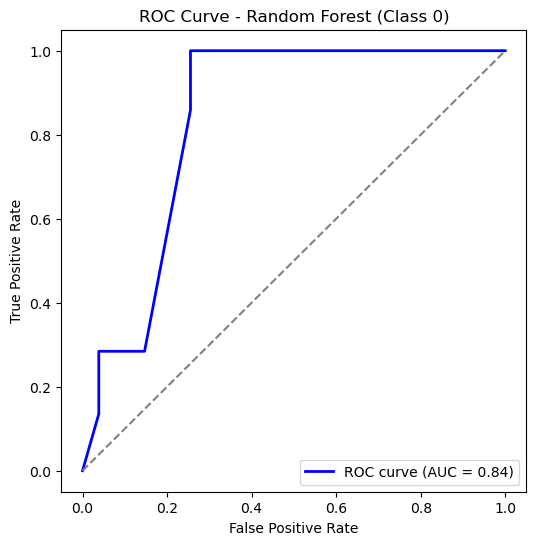

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_proba[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Class 0)')
plt.legend(loc='lower right')
plt.show()

In [81]:
import pickle

filename = "trained_model.sav"
with open(filename, "wb") as f:
    pickle.dump(rf_model, f)

with open(filename, "rb") as f:
    loaded_model = pickle.load(f)